In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

ori_image = cv2.imread("./data/image02.jpeg")
ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)

Gaussian blur

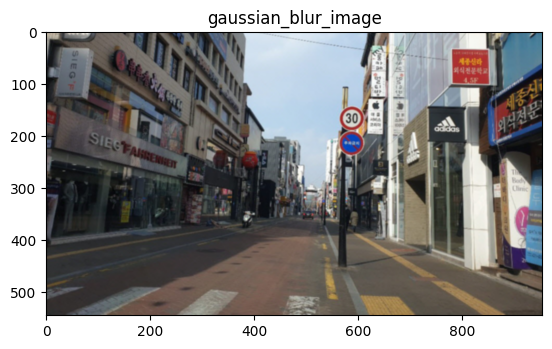

In [42]:
gaussian_blur_image = cv2.GaussianBlur(ori_image, (5, 5), 0)

plt.imshow(gaussian_blur_image)
plt.title('gaussian_blur_image')
plt.show()

median blur

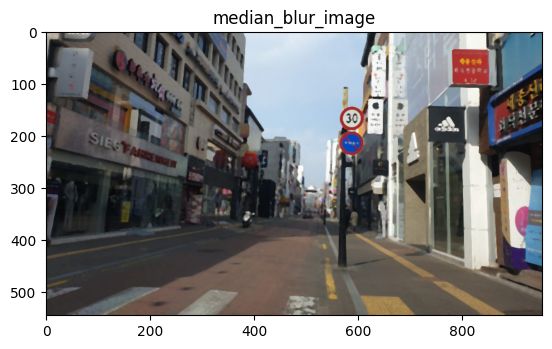

In [43]:
median_blur_image = cv2.medianBlur(ori_image, 5)

plt.imshow(median_blur_image)
plt.title('median_blur_image')
plt.show()

motion blur

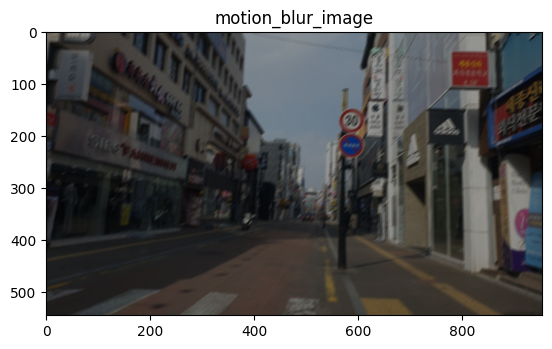

In [44]:
kernel_size = 15

kernel_direction = np.zeros((kernel_size, kernel_size))
kernel_direction[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
kernel_direction /= kernel_size
"""
kernel_direction:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 ...
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
  0.06666667 0.06666667 0.06666667]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 ...
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
"""

kernel_matrix = cv2.getRotationMatrix2D((kernel_size/2, kernel_size/2), 45, 1)
""" 
kernel_matrix:
[[ 0.70710678  0.70710678 -3.10660172]
 [-0.70710678  0.70710678  7.5       ]]
"""
kernel = np.hstack((kernel_matrix[:, :2], [[0], [0]]))
""" 
kernel:
[[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]]
"""

kernel = cv2.warpAffine(kernel_direction, kernel, (kernel_size, kernel_size))
"""
kernel:
[[0.         0.         0.         0.         0.         0.
0.         0.         0.         0.025      0.0625     0.01458333
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.025      0.0625     0.01458333 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.025      0.0625     0.01458333 0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.025      0.0625     0.01458333 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.025
  0.0625     0.01458333 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.00703125 0.0625
  0.01458333 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00410156
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 ...
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
"""

motion_blur_image = cv2.filter2D(ori_image, -1, kernel)

plt.imshow(motion_blur_image)
plt.title('motion_blur_image')
plt.show()